In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

In [23]:
months = ["03","06","09","12"]
years = range(1990,2020)
dates = []
for month in months:
    for year in years:
        date = str(year)+month+ str(29)
        dates.append(date)
data = pd.DataFrame()
for date in dates:
    new_data = pd.read_excel("mfs1" + str(date)+".xlsx",skiprows = 5)
    data = pd.concat([data, new_data], axis=0)

In [24]:
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0491B,"Castle & Cooke, Inc.",3/30/1990,19900228.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010,Business Services,10101510,@NA
1,05956310,Banco Popular de Puerto Rico,3/30/1990,NaN,1,NaN,NaN,563.792,NaN,5972.666,66.52738,56.33280,NaN,8.044921,NaN,NaN,3010,Banking,30101025,@NA
2,09959910,Borden Inc.,3/30/1990,NaN,1,NaN,NaN,1746.971,902.26430,4824.896,-32.00700,-60.55200,5086.0000,162.432000,NaN,NaN,5015,Food and Tobacco Production,50151515,@NA
3,204792,Argonaut Group,3/30/1990,19900228.0,1,NaN,NaN,0.000,NaN,1936.600,NaN,81.60000,NaN,0.000000,NaN,NaN,3015,Insurance,30151010,@NA
4,205212,ASARCO Incorporated,3/30/1990,19900228.0,1,NaN,NaN,348.079,330.48390,2440.823,113.56800,231.16500,1242.9070,28.942000,NaN,NaN,4515,Mining and Mineral Products,45152510,@NA
5,209399,Burlington Resources Inc.,3/30/1990,19900228.0,1,NaN,NaN,731.618,547.01900,6098.109,378.13090,148.94100,NaN,76.549000,NaN,NaN,2510,Upstream Energy,25101520,@NA
6,219546,Chrysler Corporation,3/30/1990,19900228.0,1,NaN,NaN,27546.000,5717.00000,51038.000,924.00000,315.00000,4238.9000,2968.000000,NaN,NaN,2020,Consumer Vehicles and Parts,20201015,@NA
7,221781,Consolidated Natural Gas Company,3/30/1990,19900228.0,1,NaN,NaN,1333.443,597.79300,4601.245,-149.94000,181.77400,4157.2250,100.119000,NaN,NaN,2515,Downstream and Midstream Energy,25151010,@NA
8,231565,Engelhard Corporation,3/30/1990,19900228.0,1,NaN,NaN,292.532,-71.04508,1339.601,22.10700,-77.48900,872.0270,28.543000,NaN,NaN,4510,"Chemical, Plastic and Rubber Materials",45102030,@NA
9,231752,ENSERCH Corporation,3/30/1990,19900228.0,1,NaN,NaN,1017.815,316.10100,3254.246,-54.12199,69.98299,1715.6080,112.002000,NaN,NaN,2515,Downstream and Midstream Energy,25151010,@NA


In [25]:
print(data.columns.values)
data.columns = ["Symbol", "Name", "Date", "Report_Date", "Is_Russell", "ROA", "D/A_Percent", "Total_Debt", 
                "EBITDA", "Total_Asset", "FCF", "NI", "Mkt_Val", "Interest", "Quarter_NI", "Quarter_NI2", 
                "Sector_Code", "Sector_Name", "Industry_Code", "Industry_Name"]

['Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3' 'Unnamed: 4'
 'Unnamed: 5' 'Unnamed: 6' 'Unnamed: 7' 'Unnamed: 8' 'Unnamed: 9'
 'Unnamed: 10' 'Unnamed: 11' 'Unnamed: 12' 'Unnamed: 13' 'Unnamed: 14'
 'Unnamed: 15' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18' 'Unnamed: 19']


In [43]:
#data = data.drop(columns = ["Quarter_NI2"])
data["Date"] = pd.to_datetime(data["Date"])

In [53]:
data2 = data.copy()
data2 = data2[['Symbol', 'Name','Date','ROA', 'D/A_Percent']].dropna(how = 'any')

In [57]:
data2.sort_values(by='Date', inplace=True)

In [59]:
data2.groupby(["Date"])["Name"].count()

Date
1991-03-28       1
1991-06-28       1
1991-09-30       1
1992-06-30       1
1992-09-30       1
1992-12-31       1
1993-06-30       1
1993-09-30       1
1993-12-31       2
1994-06-30       1
1994-09-30       3
1994-12-30       5
1995-03-31      12
1995-06-30      25
1995-09-29      29
1995-12-29      31
1996-03-29      42
1996-06-28      38
1996-09-30      39
1996-12-31      39
1997-03-31      40
1997-06-30      53
1997-09-30      55
1997-12-31      57
1998-03-31      53
1998-06-30      83
1998-09-30     103
1998-12-31     135
1999-03-31     167
1999-06-30     811
              ... 
2012-09-28     969
2012-12-31     968
2013-03-28     978
2013-06-28     978
2013-09-30     983
2013-12-31     982
2014-03-31     996
2014-06-30     996
2014-09-30    1001
2014-12-31    1004
2015-03-31    1004
2015-06-30    1002
2015-09-30     996
2015-12-31     989
2016-03-31     986
2016-06-30     973
2016-09-30     966
2016-12-30     958
2017-03-31     948
2017-06-30     957
2017-09-29     954
2017-12

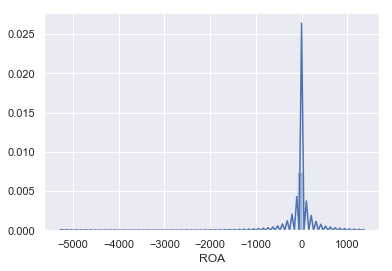

In [70]:
# See distribution
d = data2["ROA"]
sns.set(color_codes=True)
sns.distplot(d);

In [71]:
# Check Normality
stats.kstest(d,'norm')

KstestResult(statistic=0.6900450580134148, pvalue=0.0)

In [72]:
# Check kurtosis and skewness
print(kurtosis(d))
print(skew(d))

26858.99159266792
-130.89826500349193


In [75]:
# Get Min, Max, 1st & 3rd quartile, Mean, Median
values = d.describe()
values

count    80439.000000
mean         4.930191
std         24.981870
min      -5294.979000
25%          1.533552
50%          4.558404
75%          9.044004
max       1362.563000
Name: ROA, dtype: float64

In [79]:
IQR = values["75%"]-values["25%"]
IQR

7.510451500000001

In [80]:
outlier_range_min = values["50%"]-3.5*IQR
outlier_range_max = values["50%"]+3.5*IQR

In [81]:
outlier_range_min

-21.728176250000004

In [82]:
outlier_range_max

30.844984250000003

In [85]:
# Correlation between columns
data2.corr()

,ROA,D/A_Percent
ROA,1.00000,-0.04059
D/A_Percent,-0.04059,1.00000


In [86]:
# Standard deviation
data2.std()

ROA            24.981870
D/A_Percent    21.542946
dtype: float64